<a href="https://colab.research.google.com/github/dyaccu/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [26]:
import pandas as pd
import json

# Leer el archivo JSON
with open('/content/TelecomX_Data.json') as f:
    datos = json.load(f)

# Normalizar todas las columnas anidadas
df = pd.json_normalize(datos, sep='.')

# Visualizar
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



#🔧 Transformación

In [27]:
# Ver tipos de datos y valores nulos

df.info()  # Muestra tipos y nulos
df.isnull().sum()  # Cuántos valores faltantes por columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [28]:
#Convertir la columna account.Charges.Total a numérico

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')


In [29]:
#Crear la columna Cuentas_Diarias

df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30


In [33]:
#Estandarizar la columna Churn a binario

df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0


#📊 Carga y análisis

In [34]:
# Descripción general de columnas numéricas
df.describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_bin
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7043.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337,0.265370
std,0.369074,24.571773,30.129572,2268.632997,1.004319,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,9.000000,35.425000,400.225000,1.180833,0.000000
50%,0.000000,29.000000,70.300000,1391.000000,2.343333,0.000000
75%,0.000000,55.000000,89.875000,3785.300000,2.995833,1.000000
max,1.000000,72.000000,118.750000,8684.800000,3.958333,1.000000


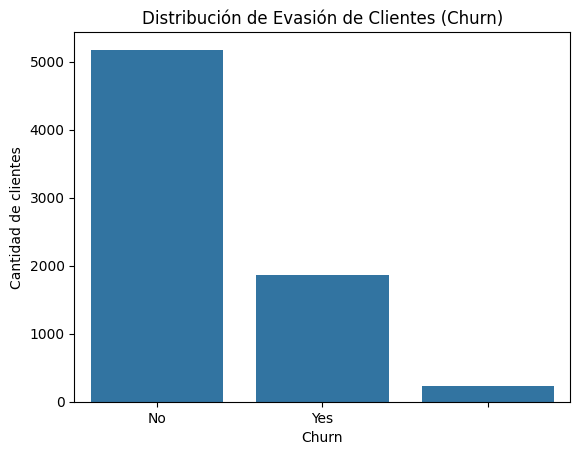

In [35]:
# Distribución de Evasión de Clientes

import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de evasión
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


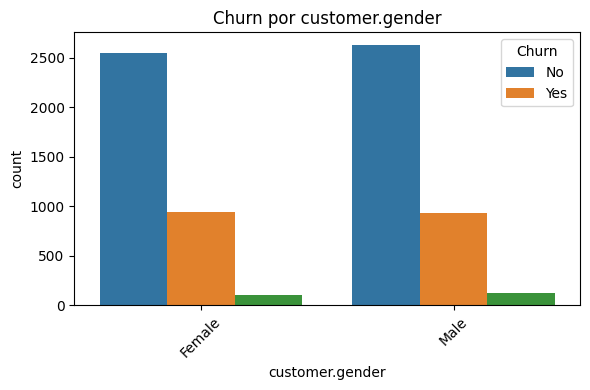

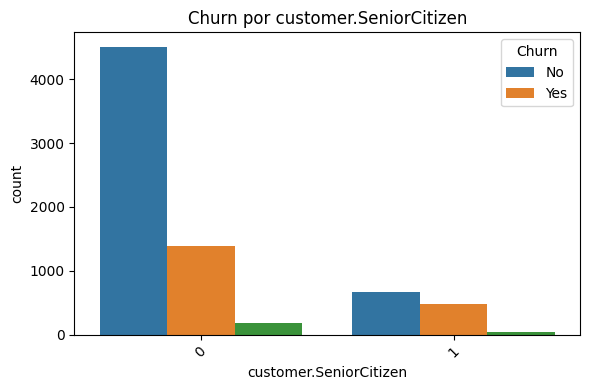

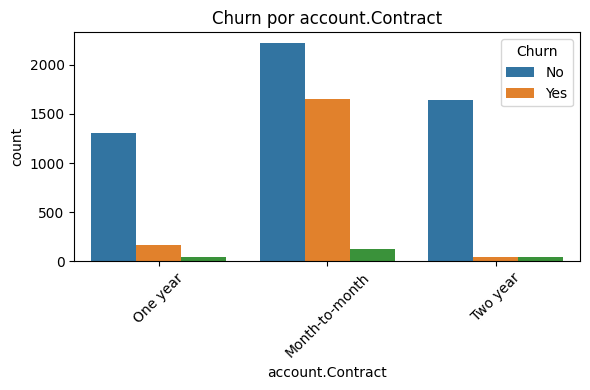

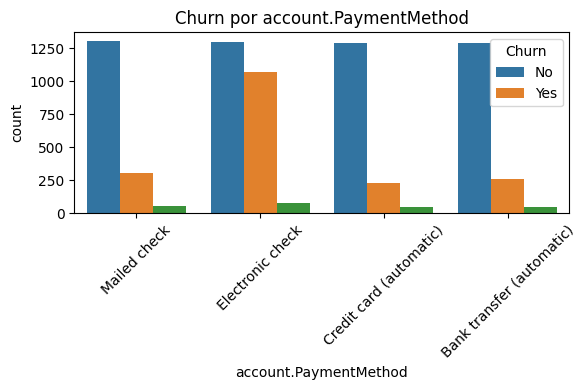

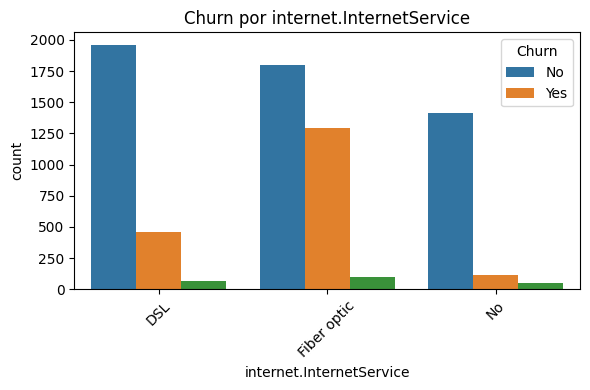

In [36]:
# Evasión por Variables Categóricas
# Podemos ver si hay diferencias de churn según el género, tipo de contrato, forma de pago, etc.

variables_categoricas = [
    'customer.gender',
    'customer.SeniorCitizen',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

for var in variables_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='Churn')
    plt.title(f'Churn por {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


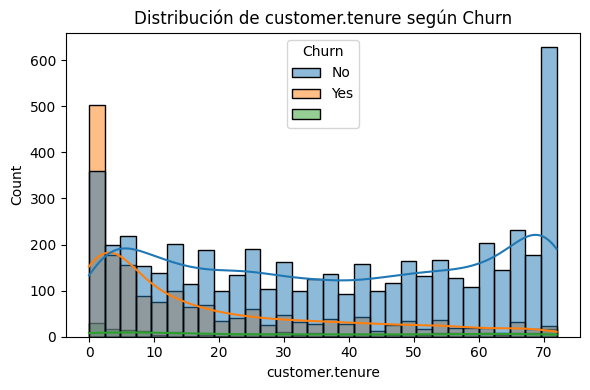

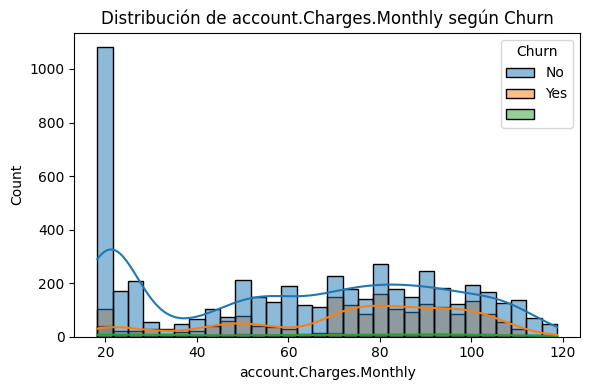

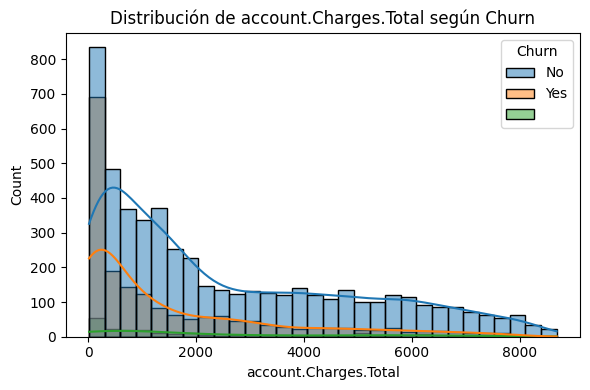

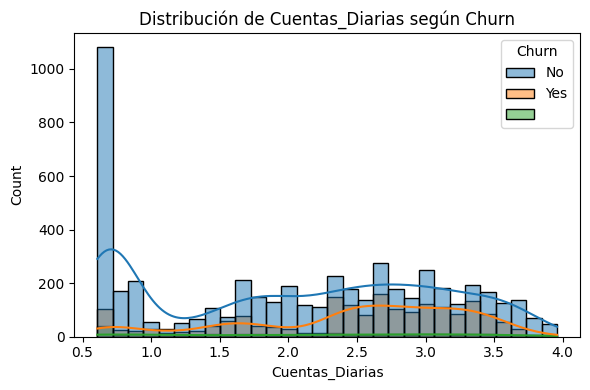

In [37]:
# Evasión por Variables Numéricas
# Ahora analizamos columnas numéricas como tenure, account.Charges.Total, etc.

variables_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias'
]

for var in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {var} según Churn')
    plt.tight_layout()
    plt.show()


#📄Informe final

## 🔹 Introducción

Este informe presenta el análisis de datos de la empresa **TelecomX LATAM**, con el objetivo de identificar factores que influyen en la **evasión de clientes (churn)**. Comprender este fenómeno permite a la compañía anticiparse a pérdidas de clientes, generar estrategias de retención y mejorar la calidad del servicio.

---

## 🔹 Limpieza y Tratamiento de Datos

Se inició el proceso de análisis con la extracción y transformación de un archivo JSON anidado, que contenía la información de clientes.

### Acciones realizadas:

- Se utilizó `pandas.json_normalize()` para desanidar el archivo y estructurar el dataframe.
- Se convirtieron las columnas de cargos mensuales y totales (`account.Charges.Total`, `account.Charges.Monthly`) a tipo numérico, eliminando posibles errores.
- Se creó una nueva columna: `Cuentas_Diarias` = `account.Charges.Monthly / 30`.
- Se estandarizó la columna `Churn`, generando una versión binaria (`Churn_bin`), donde `Yes` = 1 y `No` = 0.
- Se revisaron tipos de datos y valores nulos para garantizar integridad del dataset.

---

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizó un análisis para detectar patrones y relaciones con el churn.

### Distribución general:

- Se graficó la distribución de la variable `Churn`, observando un desequilibrio entre clientes activos y los que se dieron de baja.
  
### Variables clave analizadas:

- **Cargos Mensuales vs. Churn**: Se identificó que los clientes con cargos mensuales más altos tienden a abandonar más la empresa.
  
- **Cuentas Diarias vs. Churn**: También se observó una mayor evasión en usuarios con cuentas diarias más elevadas.
  
- **Cantidad de Servicios Contratados**: Se analizó la relación inversa entre cantidad de servicios y evasión, encontrando que quienes contratan más servicios tienen menor probabilidad de churn.

Las visualizaciones se realizaron con `seaborn` y `matplotlib`, utilizando gráficos como `countplot`, `boxplot` y `barplot`.

---

## 🔹 Conclusiones e Insights

A partir del análisis, se detectaron varios patrones relevantes:

- **Altos cargos mensuales** y **cuentas diarias** elevadas están asociados con mayor churn.
- **Clientes con menos servicios contratados** presentan mayor probabilidad de evasión.
- El desequilibrio en la variable `Churn` sugiere que es un problema que afecta a una fracción importante, pero no mayoritaria, de los usuarios.

Estos resultados permiten orientar mejor las políticas de retención de clientes.

---

## 🔹 Recomendaciones Estratégicas

1. 💡 **Crear ofertas personalizadas** para clientes con cargos mensuales altos, con descuentos o paquetes que justifiquen el valor percibido.
2. 💡 **Fomentar la contratación de servicios adicionales** (upselling), lo cual podría aumentar el compromiso del cliente.
3. 💡 **Segmentar campañas de fidelización** dirigidas a clientes con cuentas diarias elevadas, que presentan más riesgo de churn.
4. 💡 **Monitorear continuamente el churn** con modelos predictivos utilizando las variables más correlacionadas.


## ⭐ Extra (Opcional): Análisis de Correlación

Se creó una matriz de correlación utilizando `df.corr()`, destacando:

- Alta correlación entre `account.Charges.Monthly` y `account.Charges.Total`.
- Correlación positiva entre `Cuentas_Diarias` y `Churn_bin`.
- Correlación negativa leve entre `account.Services.Total` y `Churn_bin`.

Estas variables son candidatas ideales para un futuro modelo de predicción de churn.

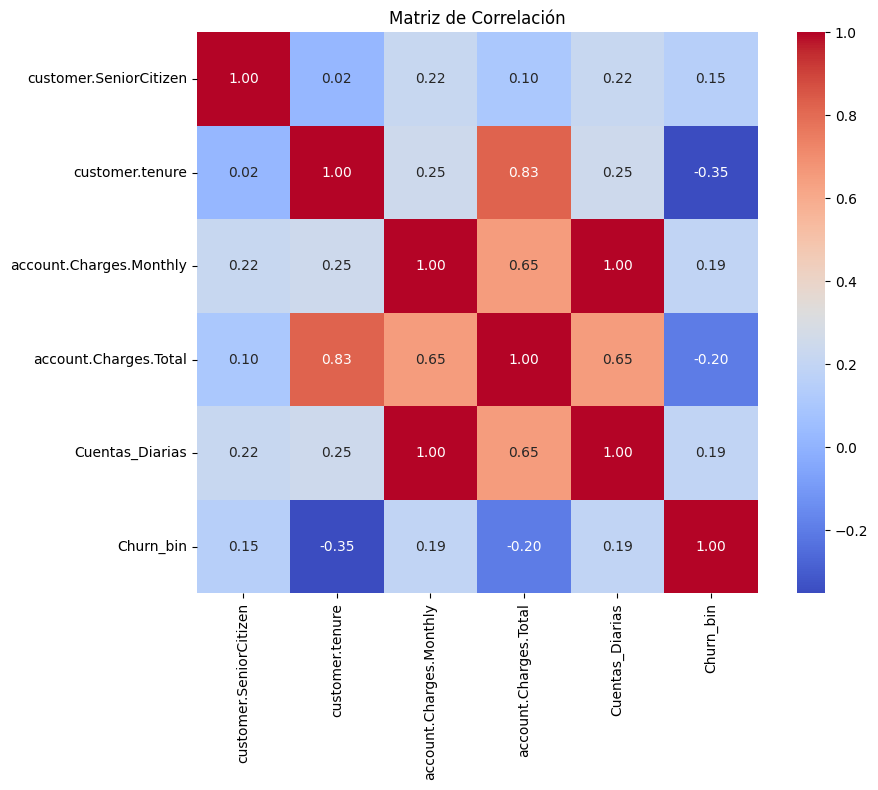

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.tight_layout()


